<a href="https://colab.research.google.com/github/aclime/Tropical-Geometry-Applications/blob/main/simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
from datetime import datetime
from numpy import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/personal/LOB project/limit order books')
#!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from limit_order_book import *
from order_generator import *

# Simulating the Book

In [ ]:
#!pip install --upgrade pandas

In [4]:
#datetime.now()
book_history=pd.DataFrame()

rg = np.random.RandomState(124)
LOB=limit_order_book()
market_order_submitter=LOB.market_order_submitter

pauses=rg.randint(low=1,high=3,size=10) #between order submissions
order_sizes=rg.randint(low=1,high=5,size=10) #between order submissions
for p,n in zip(pauses,order_sizes):
  OG=order_generator(123,n,LOB.last_price)
  print(LOB.last_price)
  orders=OG.generate_orders()
  for order in orders:
    if order.get('Instructions')=='MARKET':
      order=market_order_submitter(order)
    LOB.add_order(order)
    #print(order)
    active_order={'id':LOB.recent_id}|order
    LOB.execute_order(active_order)
    #display(LOB.vertical_display())
    snapshot=LOB.vertical_display()
    snapshot['point_in_time']=datetime.now()
    book_history=pd.concat([book_history, snapshot], ignore_index=True)
    print('---------------------')

  time.sleep(p)

book_history['truncated_time']=book_history['point_in_time'].apply(lambda x:x.strftime('%H:%M:%S.%f')[:-4])
LOB.trade_history

20
---------------------
---------------------
---------------------
19.26
---------------------
---------------------
19.26
---------------------
---------------------
19.26
---------------------
---------------------
---------------------
19.26
---------------------
21.8
---------------------
---------------------
---------------------
---------------------
17.55
---------------------
---------------------
17.55
---------------------
---------------------
---------------------
16.9
---------------------
---------------------
---------------------
16.9
---------------------
---------------------
---------------------


[{'type': 'Sell',
  'price': 19.26,
  'quantity': 752,
  'time': datetime.datetime(2023, 7, 5, 3, 42, 34, 730251)},
 {'type': 'Sell',
  'price': 19.26,
  'quantity': 93,
  'time': datetime.datetime(2023, 7, 5, 3, 42, 34, 737751)},
 {'type': 'Buy',
  'price': 19.26,
  'quantity': 1392,
  'time': datetime.datetime(2023, 7, 5, 3, 42, 35, 745085)},
 {'type': 'Sell',
  'price': 19.26,
  'quantity': 571,
  'time': datetime.datetime(2023, 7, 5, 3, 42, 35, 750693)},
 {'type': 'Buy',
  'price': 19.26,
  'quantity': 830,
  'time': datetime.datetime(2023, 7, 5, 3, 42, 36, 760136)},
 {'type': 'Sell',
  'price': 19.26,
  'quantity': 1133,
  'time': datetime.datetime(2023, 7, 5, 3, 42, 36, 765294)},
 {'type': 'Buy',
  'price': 21.8,
  'quantity': 752,
  'time': datetime.datetime(2023, 7, 5, 3, 42, 40, 799630)},
 {'type': 'Buy',
  'price': 21.8,
  'quantity': 395,
  'time': datetime.datetime(2023, 7, 5, 3, 42, 40, 799642)},
 {'type': 'Buy',
  'price': 21.8,
  'quantity': 268,
  'time': datetime.datet

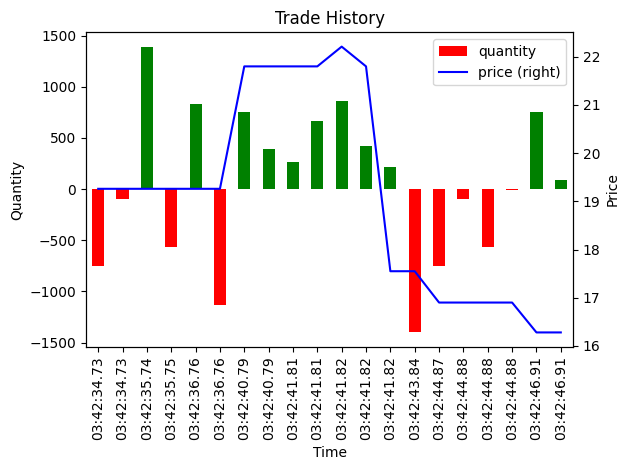

In [5]:
trade_history=pd.DataFrame.from_dict(LOB.trade_history)
def signed_trades(row):
  if row['type']=='Sell':
    return row['quantity']*-1
  else:
    return row['quantity']
trade_history['signed_quantity']=trade_history.apply(signed_trades,axis=1)
trade_history['truncated_time']=trade_history['time'].apply(lambda x:x.strftime('%H:%M:%S.%f')[:-4])
trade_times=trade_history['truncated_time']
trade_prices=trade_history['price']
trade_quantities=trade_history['signed_quantity']
colors = (trade_quantities > 0).apply(lambda x: 'g' if x else 'r')

ax = trade_history.plot(kind = 'bar', x = 'truncated_time', y = 'signed_quantity', color = colors,label='quantity')
ax2 = trade_history.plot(kind = 'line', x = 'truncated_time',y = 'price', secondary_y = True, ax = ax,color='b')

plt.title('Trade History')
ax.set_xlabel('Time')
ax.set_ylabel('Quantity')
ax2.set_ylabel('Price')
ax.set_xticklabels(labels=trade_times,rotation = 90)
plt.tight_layout()
plt.show()

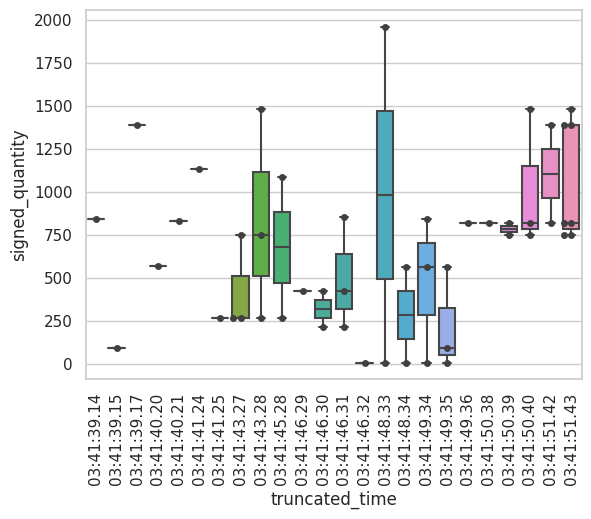

In [6]:
def signed_trades(row):
  if row['type']=='Sell':
    return row['quantity']*-1
  else:
    return row['quantity']
book_history['signed_quantity']=book_history.apply(signed_trades,axis=1)
#book_history
sns.set(style="whitegrid")
ax = sns.boxplot(x="truncated_time", y="signed_quantity", data=book_history, showfliers = False)
ax = sns.swarmplot(x="truncated_time", y="signed_quantity", data=book_history, color=".25")
#ax.set_xticklabels(labels=trade_times,rotation = 90)
plt.xticks(rotation=90)
plt.show()